In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

In [20]:
data = pd.read_csv('data/time_series_1h_EU/instantaneous_10m_wind_gust/storm_left.csv', 
                   index_col=0)

data_T = data.T

# add to the first row number to the last raw such as 1_storm_name
data_T.iloc[0] = data_T.iloc[0].astype(str)
data_T.iloc[-1] = data_T.iloc[-1].astype(str)
data_T.iloc[0] = data_T.iloc[0] + '_' + data_T.iloc[-1]

# rename the columns on the basis of the first row
data_T.columns = data_T.iloc[0]

# drop the last 2 rows and first row
data_T = data_T.drop(data_T.index[-1])
data_T = data_T.drop(data_T.index[-1])
data_T = data_T.drop(data_T.index[0])

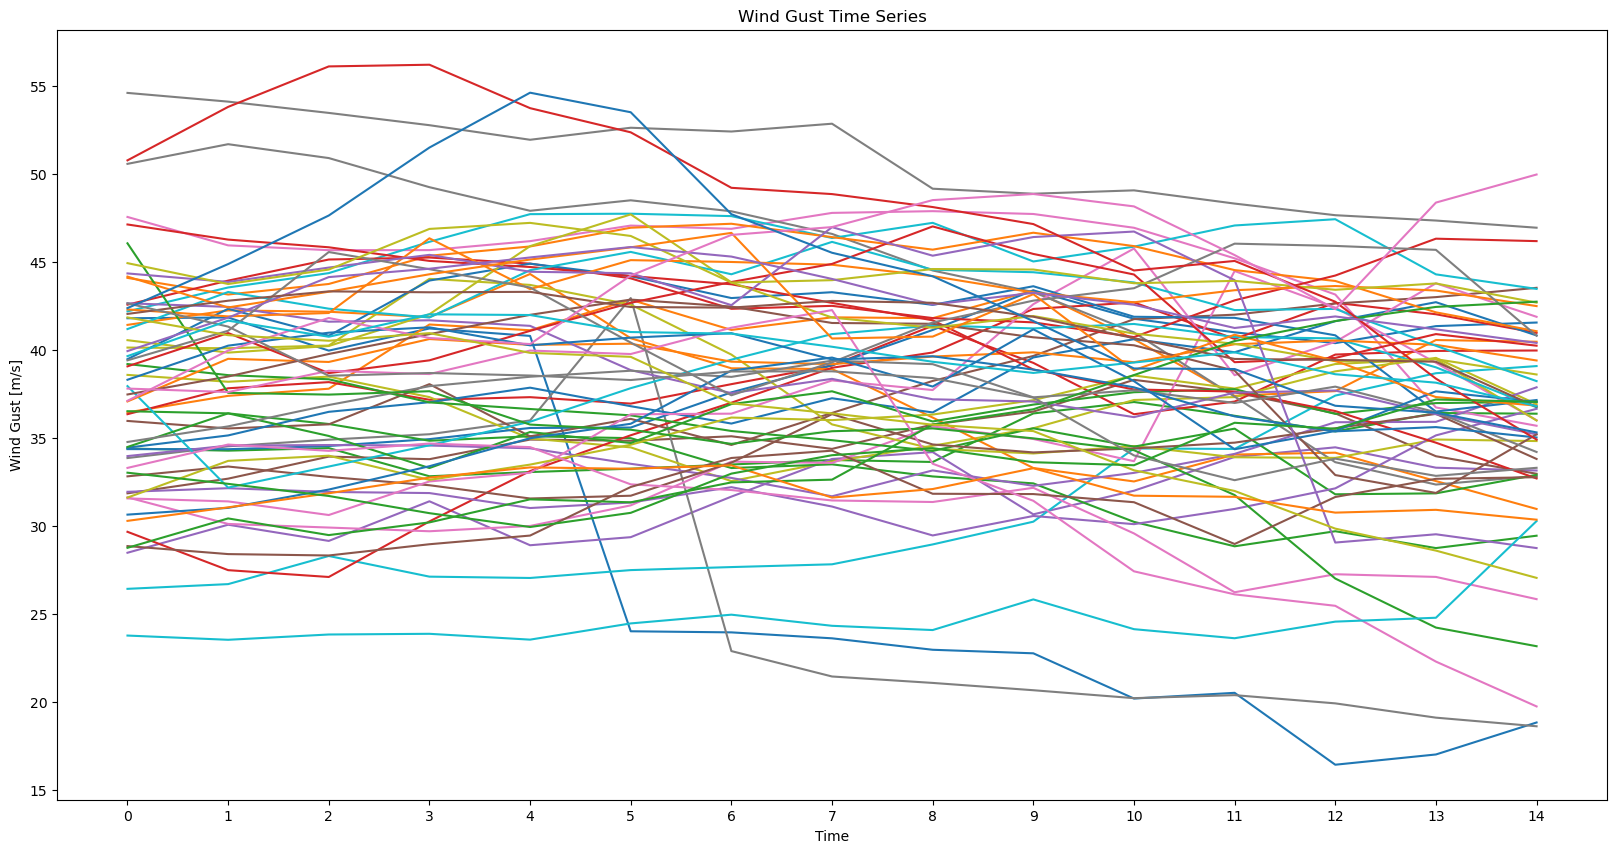

In [25]:
# plot the data

plt.figure(figsize=(20, 10))
plt.plot(data_T)
#plt.legend(data_T.columns)
plt.xlabel('Time')
plt.ylabel('Wind Gust [m/s]')
plt.title('Wind Gust Time Series')
plt.show()

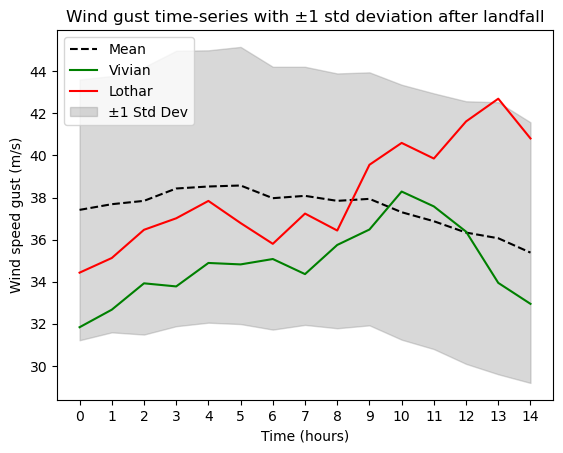

In [43]:
data_np = data_T.astype(int).to_numpy()

# Calculate the mean and standard deviation across observations (axis=1)
mean_values = data_np.mean(axis=1)
std_values = data_np.std(axis=1)

# Create time vector
time = np.arange(data_np.shape[0])  # Replace with actual time steps if available

# Plot the mean
plt.plot(time, mean_values, label='Mean', color='black', linestyle='--')
plt.plot(data_T['7_VIVIAN'], label='Vivian', color='green')
plt.plot(data_T['38_LOTHAR'], label='Lothar', color='red')

# Fill the area between mean ± std
plt.fill_between(time, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.3, label='±1 Std Dev')

# Add labels, legend, and title
plt.xlabel('Time (hours)')
plt.ylabel('Wind speed gust (m/s)')
plt.title('Wind gust time-series with ±1 std deviation after landfall')
plt.legend()

# Show plot
plt.savefig('figures/time_series_after_lf.png', dpi=300)
plt.show()

In [53]:
# load the time-series before landfall
data_before_lf = pd.read_csv('data/time_series_1h_non_EU/instantaneous_10m_wind_gust/instantaneous_10m_wind_gust_max.csv', 
                   index_col=0)
data_before_lf_T = data_before_lf.T

# drop the first row
data_before_lf_T = data_before_lf_T.drop(data_before_lf_T.index[0])

# flip the data with the last row as the first row, etc.
data_before_lf_T = data_before_lf_T.iloc[::-1]

# rename based on the on the data after landfall
data_before_lf_T.columns = data_T.columns

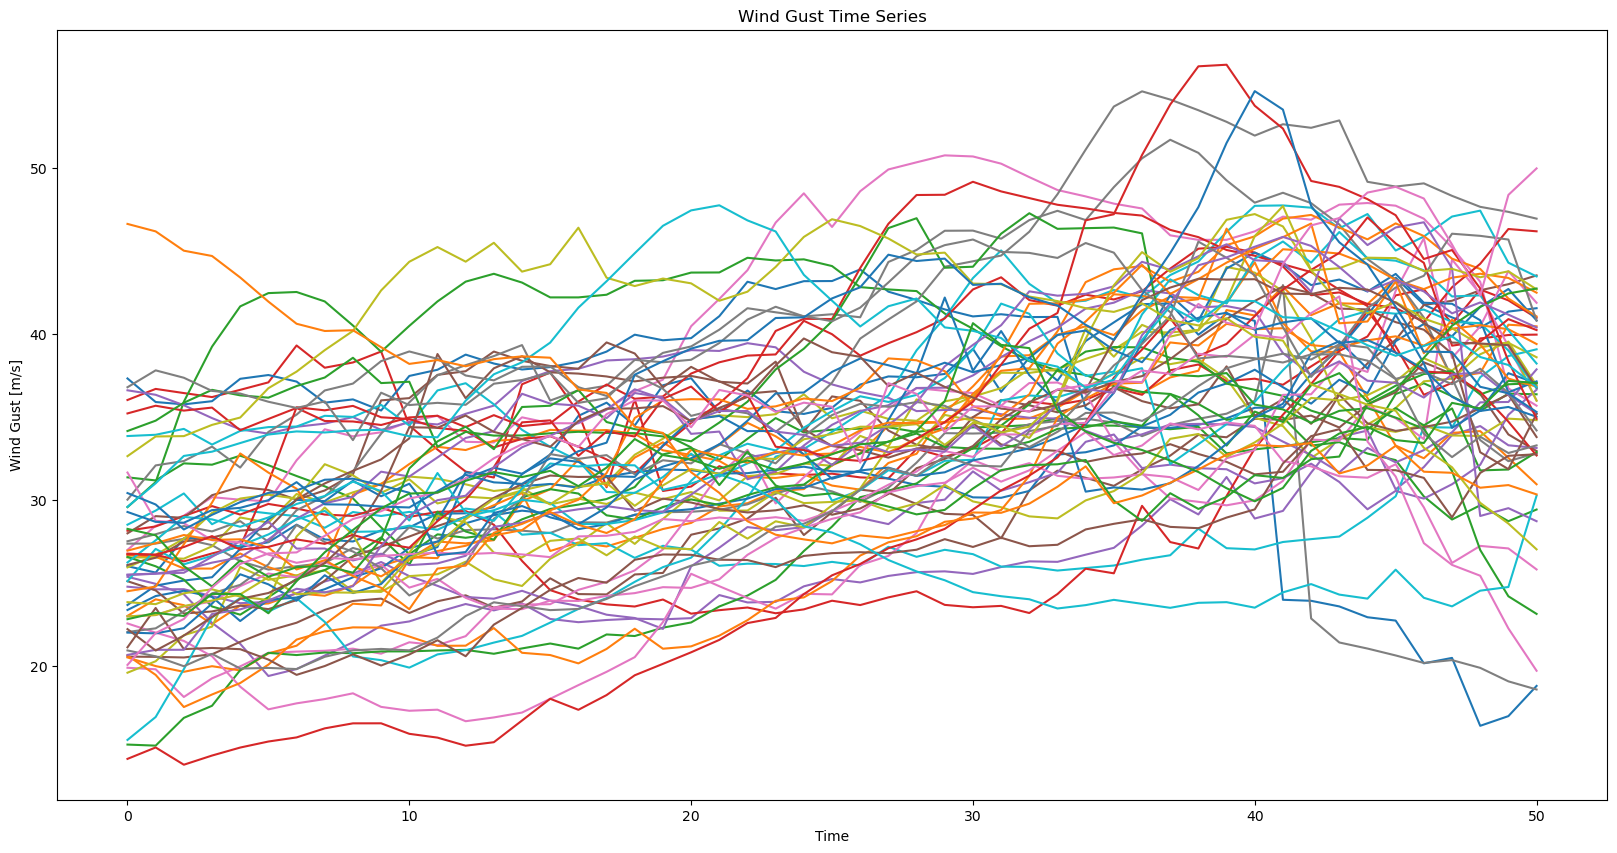

In [88]:
# create a new dataframe with the data before and after landfall
data_all = pd.concat([data_before_lf_T, data_T])

# reset the index
data_all = data_all.reset_index(drop=True)

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(data_all)
#plt.legend(data_T.columns)
plt.xlabel('Time')
plt.ylabel('Wind Gust [m/s]')
plt.title('Wind Gust Time Series')
plt.show()

In [83]:
# create a time vector from 36 to 0 and from 0 to 15 
time_before = np.arange(-35, 0, 1)
time_after = np.arange(0, 16, 1)

time_vector = np.concatenate((time_before, time_after))

# flip the data with the last row as the first row, etc.
time_vector = time_vector[::-1]

time_vector = np.arange(-35, 16, 5)

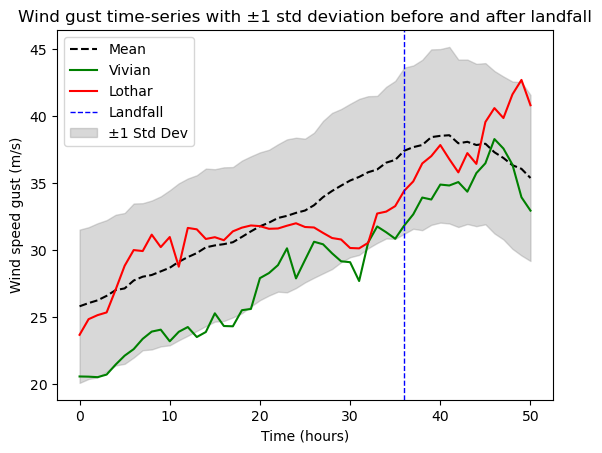

In [89]:
data_all_np = data_all.astype(int).to_numpy()

# Calculate the mean and standard deviation across observations (axis=1)
mean_values = data_all_np.mean(axis=1)
std_values = data_all_np.std(axis=1)

# Create time vector
time = np.arange(data_all_np.shape[0])  # Replace with actual time steps if available

# Plot the mean
plt.plot(time, mean_values, label='Mean', color='black', linestyle='--')
plt.plot(data_all['7_VIVIAN'], label='Vivian', color='green')
plt.plot(data_all['38_LOTHAR'], label='Lothar', color='red')
# Add a vertical line for landfall (time = 0)
plt.axvline(x=36, color='blue', linestyle='--', linewidth=1, label='Landfall')

# Set xticks to cover the full range (-35 to 15)
#plt.xticks(time_vector)  # Ticks every 5 units

# Fill the area between mean ± std
plt.fill_between(time, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.3, label='±1 Std Dev')

# Add labels, legend, and title
plt.xlabel('Time (hours)')
plt.ylabel('Wind speed gust (m/s)')
plt.title('Wind gust time-series with ±1 std deviation before and after landfall')
plt.legend()

# Show plot
plt.savefig('figures/time_series_all.png', dpi=300)
plt.show()